In [6]:
# Step 1 
%pylab inline
%matplotlib inline
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
# connect python to oracle

con=cx_Oracle.connect('FP/1234@localhost')
cur = con.cursor()
#cur.execute('drop table sname')
cur.execute('create table sname (symbol VARCHAR2(5), company VARCHAR2(60))')
with open('C:\Users\AERIE\Dropbox\Jungo\STSCI4060\FinalProject\NYSE_Stock_code_names.txt','r') as s_name:
    content = s_name.read().splitlines()
    content = content[1:]


temp = []
for row in content:
    temp.append(row.split('\t'))

cur.executemany("insert into sname(symbol, company) values (:c1, :c2)", temp)

con.commit()

cur.close() 
con.close()


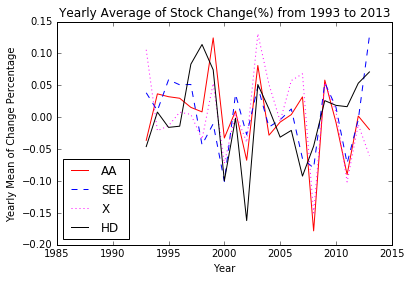

In [10]:
# step 3 
# 1.target_stock table
con_3=cx_Oracle.connect('FP/1234@localhost')
cur_3 = con_3.cursor()
#cur_3.execute('drop table target_stocks')
cur_3.execute('''create table target_stocks as
              select substr(sdate,1,4) as year,AA_,SEE_,X_,HD_ from sprices''')
con_3.commit()
cur_3.close()
con_3.close()
# 2. year average of stock change percentage 
con = cx_Oracle.connect('FP/1234@localhost')

cur = con.cursor()

cur.execute('''select year, avg(AA_) as avg_AA, 
                avg(SEE_) as avg_SEE,
                  avg(X_) as avg_X,
                    avg(HD_) as avg_HD 
                          from target_stocks
                         group by year
                         order by year''')

output = cur.fetchall()

dat_plot = pd.DataFrame(output)

year = dat_plot[dat_plot.columns[0]]

aa = dat_plot[dat_plot.columns[1]]

see = dat_plot[dat_plot.columns[2]]

x = dat_plot[dat_plot.columns[3]]

hd = dat_plot[dat_plot.columns[4]]

plt.plot(year,aa,color='red',linestyle='-',label="AA")
plt.plot(year,see,color='blue',linestyle='--',label="SEE")
plt.plot(year,x,color='magenta',linestyle=':',label="X")
plt.plot(year,hd,color='black',linestyle='-',label="HD")
plt.xlim(1985,2015)
plt.xlabel('Year')
plt.ylabel('Yearly Mean of Change Percentage')
plt.legend(loc=3)
plt.title("Yearly Average of Stock Change(%) from 1993 to 2013")


